# 05. Business Actionable Insights & Evaluation

**Objective**: Translate technical clustering results into professional business strategies. We evaluate all three candidate models (K-Means, DBSCAN, Hierarchical) to provide a recommendation based on interpretability and actionable segmentation.

**Key Techniques:**
*   **Radar Charts**: Visualize the "personality" of each cluster (e.g., "High Spenders" vs. "Bargain Hunters").
*   **SHAP Values**: Explain *why* a customer falls into a specific cluster (Feature Importance).
*   **Business Profiling**: Define personas and marketing strategies.

In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')
from clustering_library import ClusterAnalyzer, DataVisualizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load Data & Clustering Results

We load the scaled features (for technical analysis/SHAP) and the original features (for business profiling), along with the cluster labels saved from the Validation step.

In [5]:
analyzer = ClusterAnalyzer()
df_scaled, df_original = analyzer.load_data()

rename_map = {
    'recency': 'Recency',
    'frequency': 'Frequency',
    'monetary': 'Monetary',
    'tenure': 'Tenure'
}
df_original.rename(columns=rename_map, inplace=True)
print("Columns in df_original:", df_original.columns.tolist())

# Load pre-computed labels
try:
    results_df = pd.read_csv("../data/processed/clustered_customers.csv", index_col=0)
    print("Loaded clustering results successfully.")
    print(results_df.head())
except FileNotFoundError:
    print("Error: '../data/processed/clustered_customers.csv' not found. Please run 04_Technical_Validation.ipynb first.")

Số khách hàng: 3920
Số features: 16
Columns in df_original: ['Sum_Quantity', 'Mean_UnitPrice', 'Mean_TotalPrice', 'Sum_TotalPrice', 'Count_Invoice', 'Count_Stock', 'Mean_InvoiceCountPerStock', 'Mean_StockCountPerInvoice', 'Mean_UnitPriceMeanPerInvoice', 'Mean_QuantitySumPerInvoice', 'Mean_TotalPriceMeanPerInvoice', 'Mean_TotalPriceSumPerInvoice', 'Mean_UnitPriceMeanPerStock', 'Mean_QuantitySumPerStock', 'Mean_TotalPriceMeanPerStock', 'Mean_TotalPriceSumPerStock']
Loaded clustering results successfully.
            Cluster_KMeans  Cluster_DBSCAN  Cluster_Hierarchical
CustomerID                                                      
12346                    1              -1                     0
12747                    1               0                     2
12748                    1              -1                     2
12749                    1               0                     2
12820                    1               0                     2


## 2. Comparative Business Evaluation

We will iterate through each model to generate profiles and explainability visuals.


==================== ANALYZING MODEL: KMeans ====================
Number of Clusters: 3 (Noise points: 0)

Cluster Sizes:
Cluster
0    1464
1    1568
2     888
Name: count, dtype: int64

Cluster Profiles (Key Metrics Mean):
RFM columns not found for profile display, showing all:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
Cluster,,,,,,,,,,,,,,,,
0,174.01,6.63,34.26,371.84,1.75,15.95,1.08,10.74,7.17,113.56,36.10,233.26,6.62,16.32,33.67,40.12
1,2286.63,3.49,143.77,3884.26,7.14,83.91,1.48,21.34,4.13,410.57,168.25,625.83,3.70,130.10,141.81,194.41
2,469.10,2.58,6.42,758.45,3.25,93.62,1.21,41.47,2.72,161.05,7.25,246.16,2.60,5.05,6.39,7.69



Generating Radar Chart for KMeans...


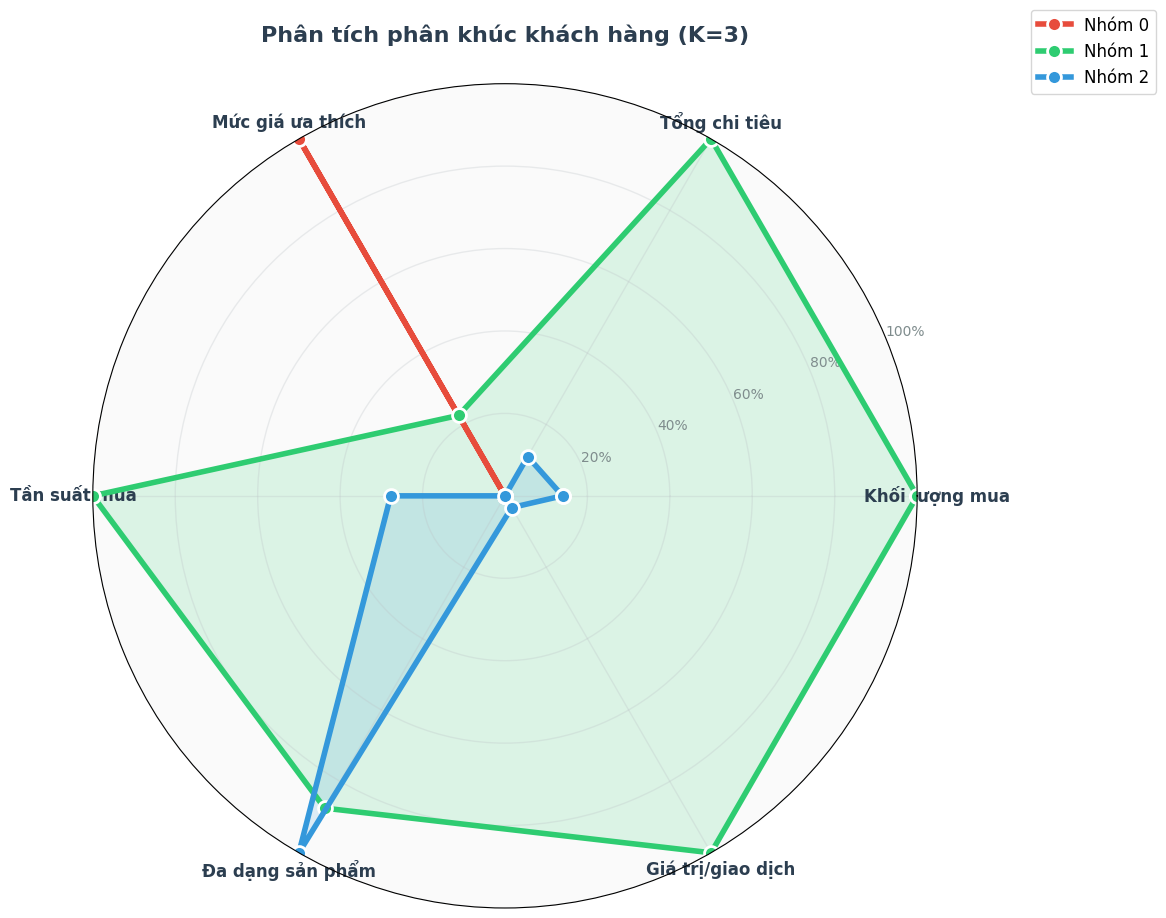


Generating Individual Radar Plots for KMeans...


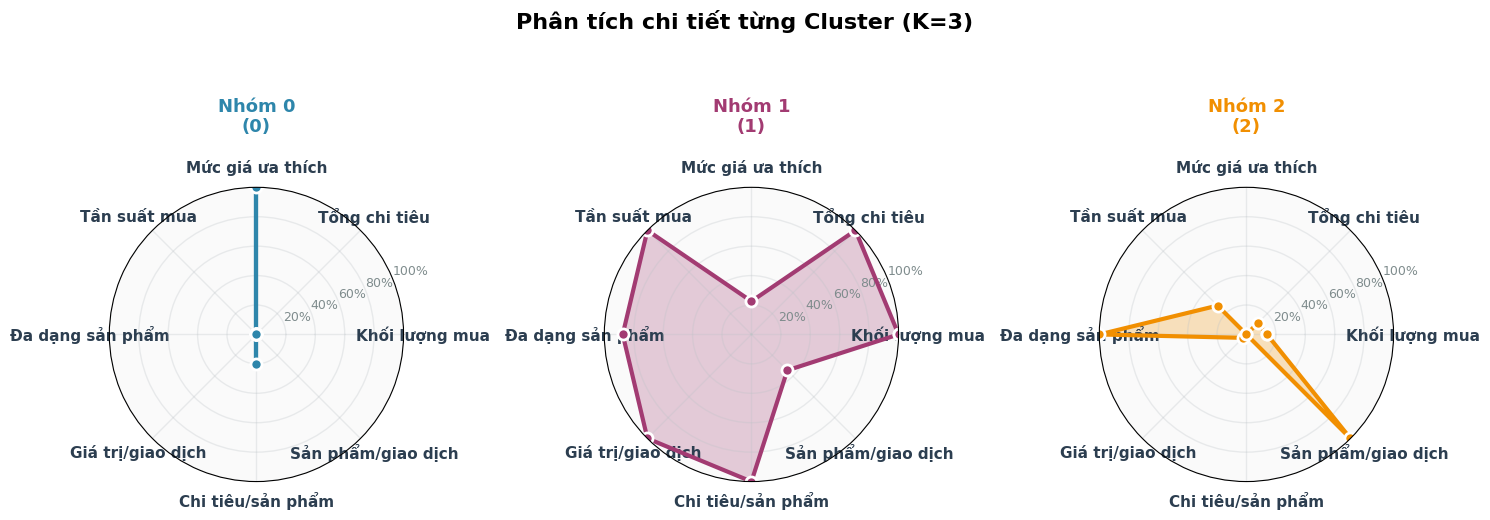


Calculating SHAP values for KMeans...
=== HUẤN LUYỆN MÔ HÌNH THAY THẾ (k=3) ===
Độ chính xác: 1.0000 (100.00%)

Confusion Matrix:
[[1464    0    0]
 [   0 1568    0]
 [   0    0  888]]

Mô hình có thể dự đoán CHÍNH XÁC các phân cụm.
Tính toán SHAP values cho 3,920 khách hàng...
Hoàn thành! SHAP values: 3 clusters, mỗi cluster shape: (3920, 16)
SHAP Summary Plot for KMeans:


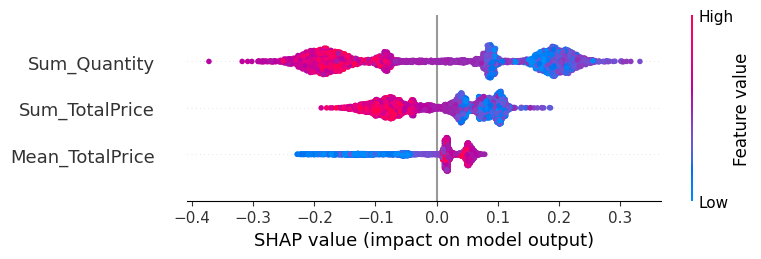

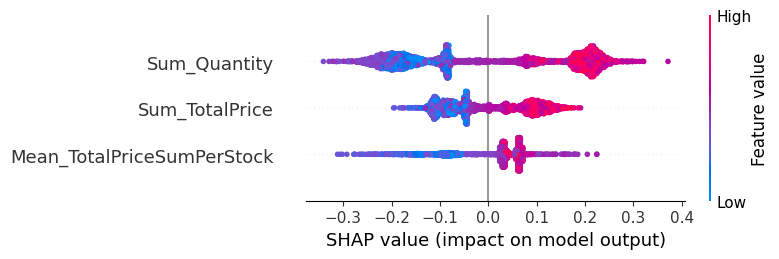

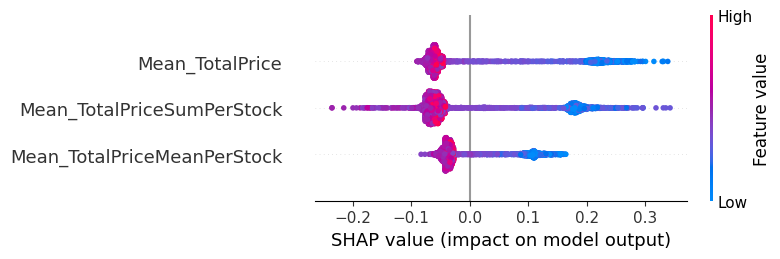


==================== ANALYZING MODEL: DBSCAN ====================
Number of Clusters: 3 (Noise points: 170)

Cluster Sizes:
Cluster
-1     170
 0    3741
 1       5
 2       4
Name: count, dtype: int64

Cluster Profiles (Key Metrics Mean):
RFM columns not found for profile display, showing all:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
Cluster,,,,,,,,,,,,,,,,
-1,6350.13,33.29,1110.26,11161.06,8.33,76.18,1.56,13.77,38.83,1237.92,1285.57,1718.19,35.36,944.27,1108.12,1432.37
0,848.91,3.16,24.46,1446.01,4.07,60.17,1.26,22.36,3.42,198.12,27.67,333.55,3.15,18.93,23.49,33.64
1,77.60,1.02,78.06,78.06,1.00,1.00,1.00,1.00,1.02,77.60,78.06,78.06,1.02,77.60,78.06,78.06
2,261.00,1.07,165.51,273.78,1.00,1.75,1.00,1.75,1.07,261.00,165.51,273.78,1.07,157.50,165.51,165.51



Generating Radar Chart for DBSCAN...


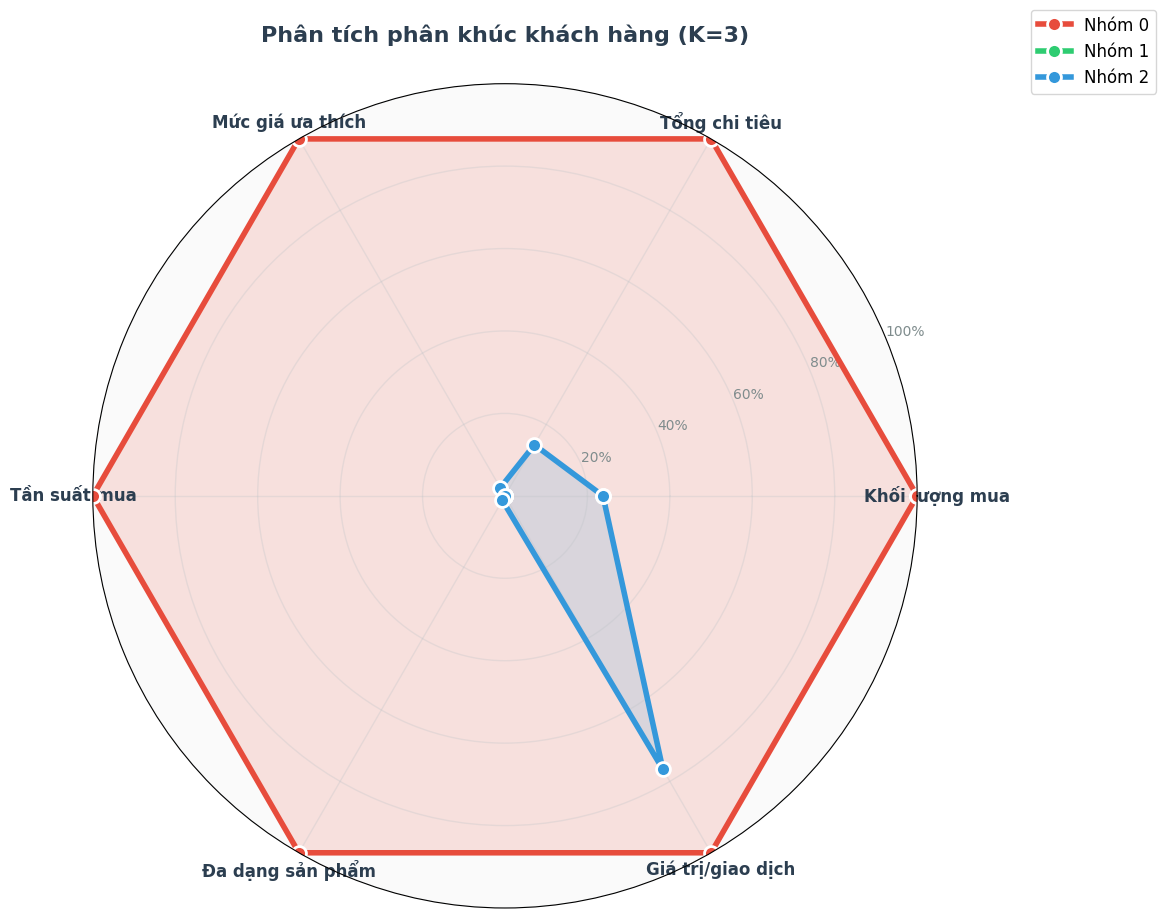


Generating Individual Radar Plots for DBSCAN...


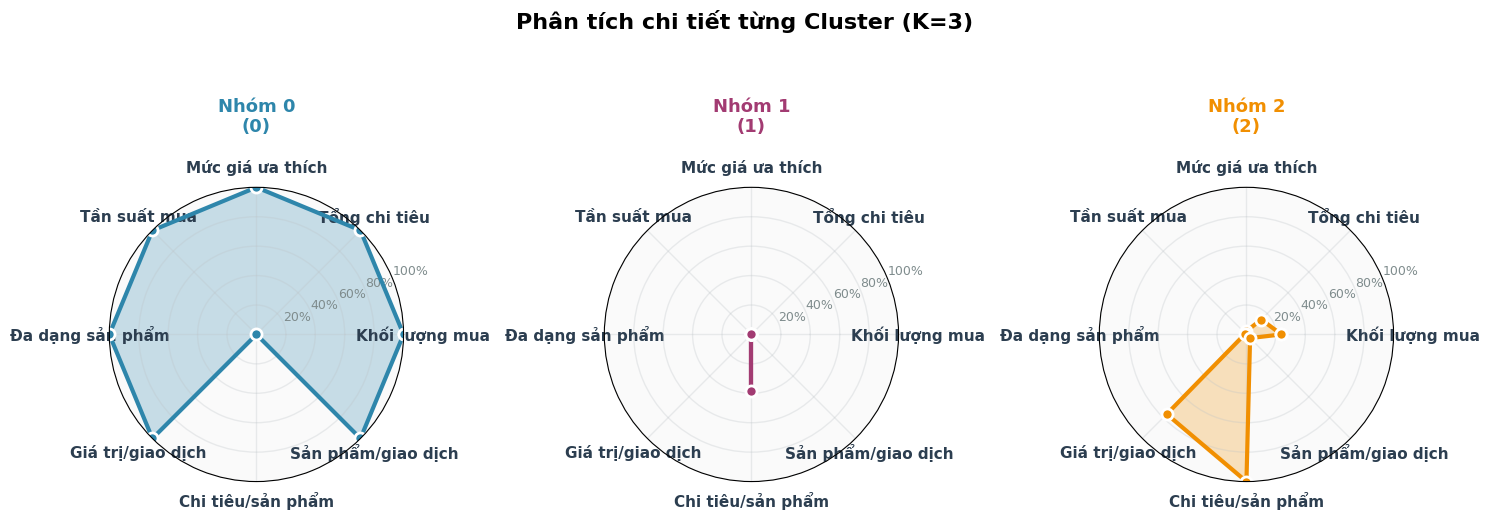


Calculating SHAP values for DBSCAN...
=== HUẤN LUYỆN MÔ HÌNH THAY THẾ (k=3) ===
Độ chính xác: 1.0000 (100.00%)

Confusion Matrix:
[[ 170    0    0    0]
 [   0 3741    0    0]
 [   0    0    5    0]
 [   0    0    0    4]]

Mô hình có thể dự đoán CHÍNH XÁC các phân cụm.
Tính toán SHAP values cho 3,920 khách hàng...
Hoàn thành! SHAP values: 4 clusters, mỗi cluster shape: (3920, 16)
SHAP Summary Plot for DBSCAN:


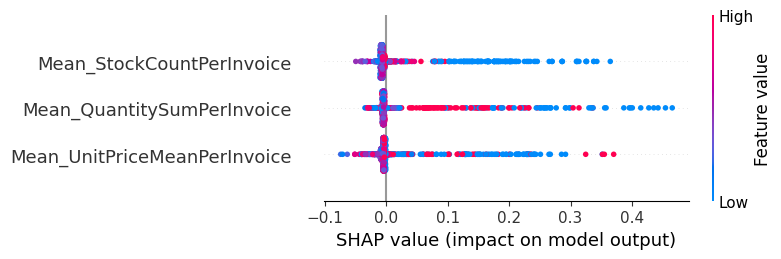

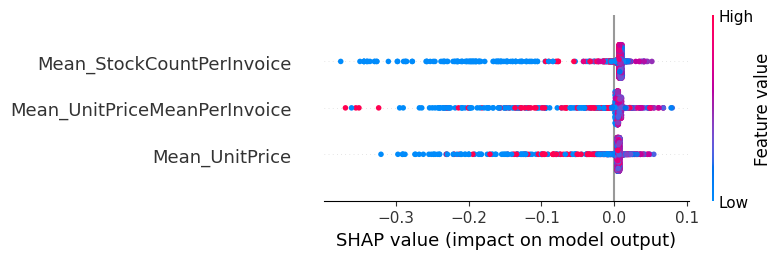

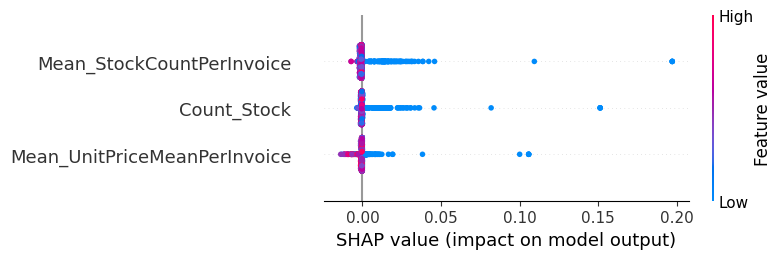


==================== ANALYZING MODEL: Hierarchical ====================
Number of Clusters: 4 (Noise points: 0)

Cluster Sizes:
Cluster
0     512
1     975
2    1557
3     876
Name: count, dtype: int64

Cluster Profiles (Key Metrics Mean):
RFM columns not found for profile display, showing all:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
Cluster,,,,,,,,,,,,,,,,
0,1979.12,1.73,357.91,3217.13,2.82,16.03,1.26,12.19,1.73,591.29,416.68,732.16,1.73,346.02,355.89,420.30
1,210.81,9.76,54.45,527.00,1.86,15.05,1.10,10.19,10.66,101.46,56.93,255.80,10.12,18.64,54.00,92.94
2,1732.58,3.00,25.15,2929.75,6.89,92.25,1.42,22.79,3.57,273.00,30.56,456.30,2.97,21.17,23.59,37.02
3,388.43,2.74,6.61,668.69,3.04,81.65,1.20,39.21,2.92,144.18,7.63,235.88,2.75,4.65,6.54,7.93



Generating Radar Chart for Hierarchical...


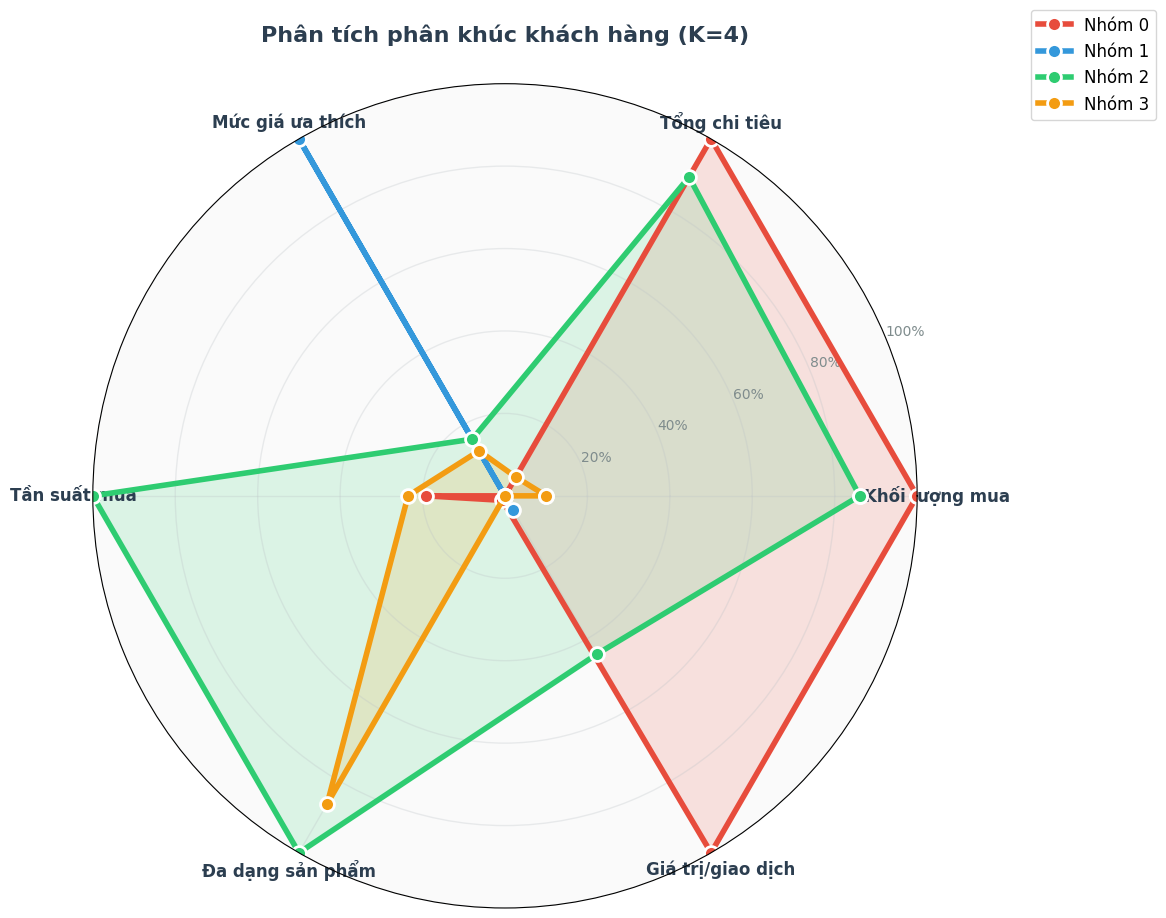


Generating Individual Radar Plots for Hierarchical...


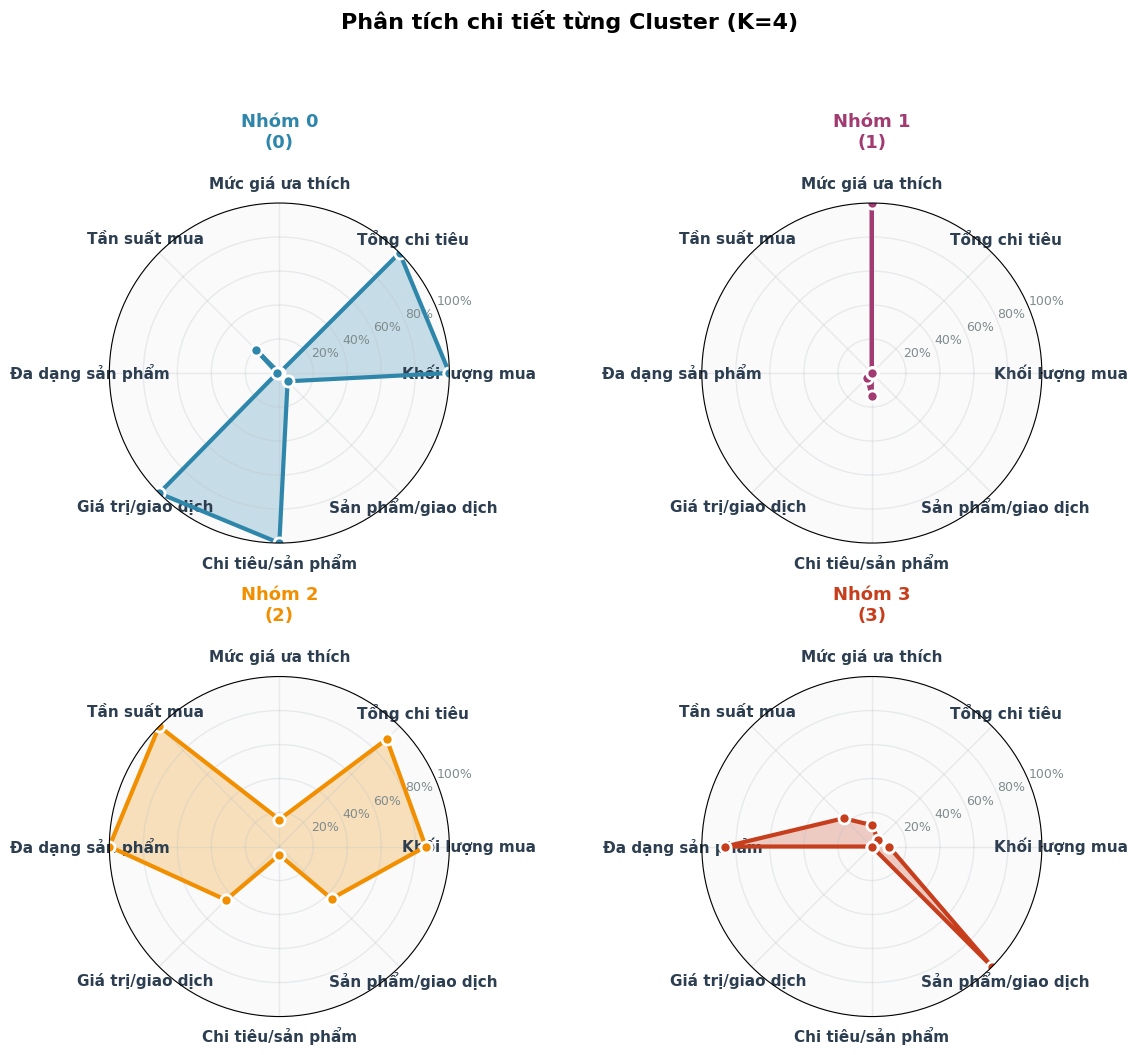


Calculating SHAP values for Hierarchical...
=== HUẤN LUYỆN MÔ HÌNH THAY THẾ (k=4) ===
Độ chính xác: 1.0000 (100.00%)

Confusion Matrix:
[[ 512    0    0    0]
 [   0  975    0    0]
 [   0    0 1557    0]
 [   0    0    0  876]]

Mô hình có thể dự đoán CHÍNH XÁC các phân cụm.
Tính toán SHAP values cho 3,920 khách hàng...
Hoàn thành! SHAP values: 4 clusters, mỗi cluster shape: (3920, 16)
SHAP Summary Plot for Hierarchical:


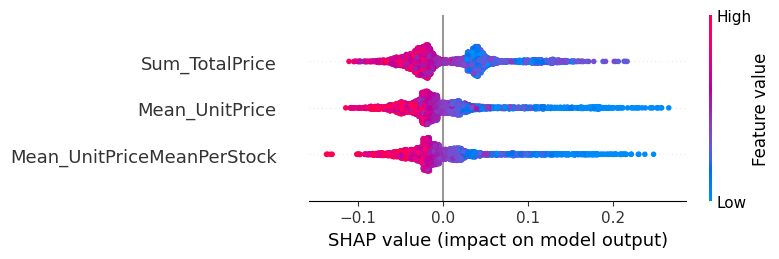

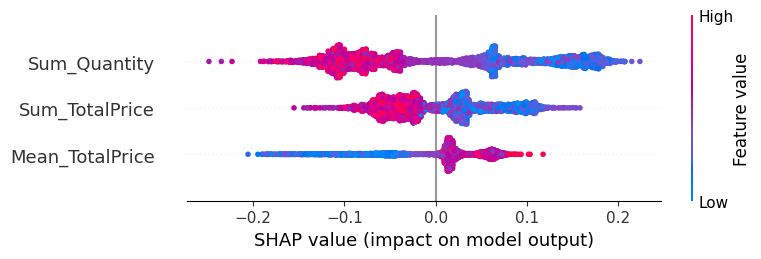

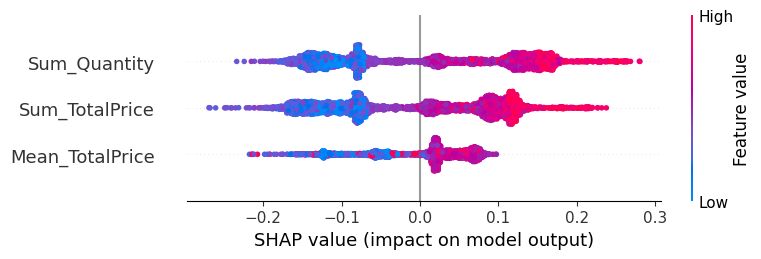

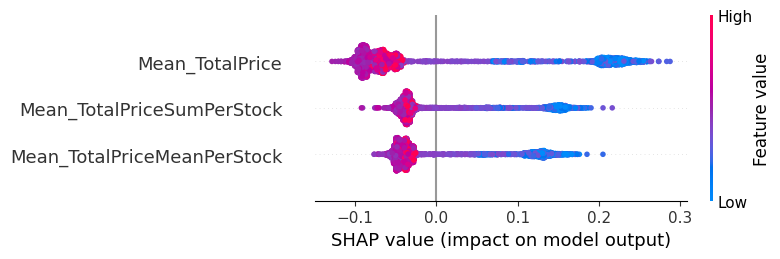

In [6]:
models = ['KMeans', 'DBSCAN', 'Hierarchical']

for model_name in models:
    col_name = f'Cluster_{model_name}'
    if col_name not in results_df.columns:
        print(f"\nSkipping {model_name} (Labels not found)")
        continue
        
    print(f"\n{'='*20} ANALYZING MODEL: {model_name} {'='*20}")
    
    # Get labels
    labels = results_df[col_name].values
    
    # Handle Noise in DBSCAN for profiling (usually exclude -1 or treat separately)
    # We'll treat -1 as a distinct group for visualization
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    print(f"Number of Clusters: {n_clusters} (Noise points: {np.sum(labels == -1)})\n")
    
    if n_clusters < 1 and np.sum(labels == -1) == 0:
        print("No valid clusters and no noise. Skipping.")
        continue
    elif n_clusters < 2:
        print("Note: Only 1 cluster found (plus noise). Analyzing as Single Group vs Noise.")

    # --- 2.1. Cluster Statistics ---
    # Merge labels with original data for interpretable means
    df_business = df_original.copy()
    df_business['Cluster'] = labels
    
    cluster_means = df_business.groupby('Cluster').mean()
    cluster_sizes = df_business['Cluster'].value_counts().sort_index()
    
    print("Cluster Sizes:")
    print(cluster_sizes)
    print("\nCluster Profiles (Key Metrics Mean):")
    
    # Display specific RFM columns if available, otherwise all
    cols_to_show = ['Recency', 'Frequency', 'Monetary']
    available_cols = [c for c in cols_to_show if c in cluster_means.columns]
    if available_cols:
        display(cluster_means[available_cols].round(2))
    else:
        print("RFM columns not found for profile display, showing all:")
        display(cluster_means.round(2))

    # --- 2.2. Radar Chart Visualization ---
    print(f"\nGenerating Radar Chart for {model_name}...")
    # Manually inject into analyzer to allow helper methods to work
    # Note: create_radar_chart typically expects labels 0..k-1. 
    # DBSCAN might have -1. simple workaround: let analyzer handle it via 'labels' arg if supported, or filter.
    try:
        # The `create_radar_chart` in library likely expects labels. 
        # We filter out noise for Radar Chart clarity if it's DBSCAN
        clean_mask = labels != -1
        if np.sum(clean_mask) > 0:
            # We also need to temporarily update analyzer.df_original because helper methods might use it
            # Ensure analyzer has the standardized columns
            analyzer.df_original = df_original[clean_mask].copy()
            
            analyzer.create_radar_chart(labels=labels[clean_mask])
            
            # --- 2.2b. Individual Cluster Profiles ---
            print(f"\nGenerating Individual Radar Plots for {model_name}...")
            # Ensure we use the correct key (k_key) which we set for SHAP later, but we need to set it NOW if we use it here.
            # However, looking at the code structure, k_key is defined later for SHAP.
            # We need to manually register the means for create_individual_radar_plots to work.
            
            # Re-calculate means using the clean mask to match the visualization data
            clean_labels = labels[clean_mask]
            
            # If DBSCAN, n_clusters might be 1, but we want to plot whatever valid clusters we found.
            # create_individual_radar_plots uses self.cluster_results[k]["means"]
            
            # We'll stick to a temporary key = 999 or just reuse n_clusters if unique
            temp_key = n_clusters if n_clusters > 0 else 1
            
            # Prepare a temporary dataframe to calc means exactly as the library expects
            temp_df = df_original[clean_mask].copy()
            temp_df['Cluster'] = clean_labels
            temp_means = temp_df.groupby('Cluster').mean()
            
            # Inject into analyzer
            analyzer.cluster_results[temp_key] = {
                'labels': clean_labels,
                'means': temp_means
            }
            
            try:
                analyzer.create_individual_radar_plots(temp_key)
            except Exception as e:
                print(f"Could not generate Individual Radar Plots: {e}")
                import traceback
                traceback.print_exc()
        else:
            print("No non-noise data to plot.")
    except Exception as e:
        print(f"Could not generate Radar Chart: {e}")

    # --- 2.3. Explainability (SHAP) ---
    print(f"\nCalculating SHAP values for {model_name}...")
    
    # We need to register the results in analyzer to use its training/SHAP methods
    # The helper methods use integer keys (k). We'll use a dummy integer key relative to n_clusters
    # or modify state directly.
    
    k_key = n_clusters
    analyzer.cluster_results[k_key] = {
        'labels': labels,
        'means': cluster_means
    }

    try:
        # 1. Train Surrogate Random Forest
        analyzer.train_surrogate_model(k_key)
        
        # 2. Calculate SHAP
        analyzer.calculate_shap_values(k_key)
        
        # 3. Plot SHAP Summary
        print(f"SHAP Summary Plot for {model_name}:")
        analyzer.plot_shap_summary(k_key)
        
    except Exception as e:
        print(f"Error in SHAP analysis for {model_name}: {e}")
        # Traceback often helps debugging SHAP version/library issues
        # import traceback
        # traceback.print_exc()